### Installing packages

In [1]:
#import sys
#!{sys.executable} -m pip install geopandas

# Wildfire Data Visualizations
#### Authors: Vivian Luong, Saadia Karim, Joya Monishi

## Library imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set_palette(sns.color_palette("Set1"))
sns.set_palette("pastel")
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action='ignore')

# EDA

In [3]:
df = pd.read_csv("../capstone-accenture/clean_data/fireClimateHumanTable_editted.csv")

In [4]:
df.head()

,time,month_factor,month_and_year_factor,latitude,longitude,county,year,count,2m_temperature,total_precipitation,low_vegetation_cover,high_vegetation_cover,10m_wind_speed,volumetric_soil_water_layer_1,total_cloud_cover,housingdensity,population,populationdensity
0,1/1/2013,0,0,37.75,-122.25,Alameda,2013,0,45.88,0.0008,0.596,0.18,1.83,0.33,0.39,589352,1579593,2137.42
1,1/1/2013,0,0,38.50,-120.75,Amador,2013,0,41.40,0.0011,0.002,1.00,2.41,0.41,0.35,18241,36620,61.59
2,1/1/2013,0,0,40.00,-121.75,Butte,2013,0,39.93,0.0009,0.176,0.82,2.74,0.38,0.39,96989,221641,135.44
3,1/1/2013,0,0,38.50,-120.75,Calaveras,2013,0,37.85,0.0011,0.078,0.92,2.17,0.40,0.35,28024,44655,43.78
4,1/1/2013,0,0,39.25,-122.25,Colusa,2013,0,45.22,0.0007,0.392,0.57,1.82,0.32,0.38,7892,21250,18.47


In [5]:
#df.info()

In [6]:
print("Unique counties:", len(df.county.unique()))
print("\nFire value counts")
df['count'].value_counts()

Unique counties: 56

Fire value counts


0     3901
1      494
2      158
3       69
4       40
5       22
6       10
7        5
8        3
12       2
Name: count, dtype: int64

### *Features over time

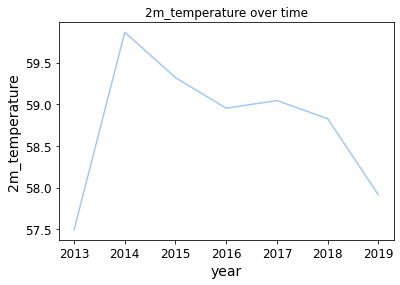

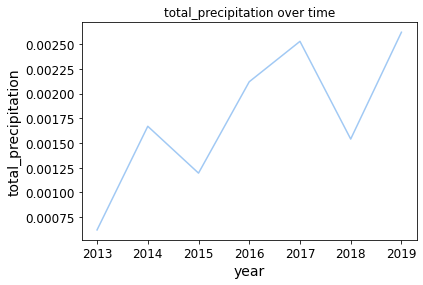

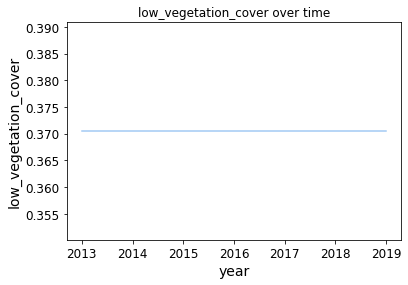

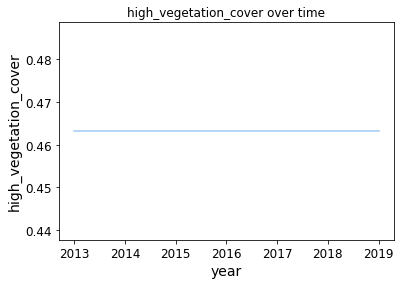

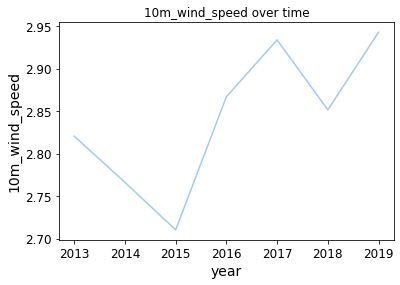

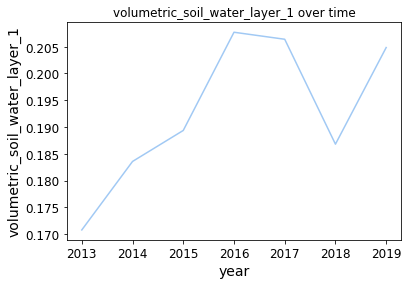

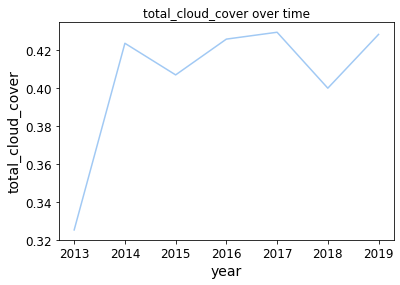

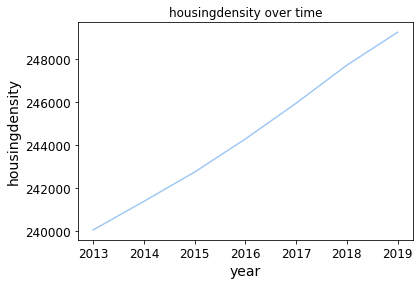

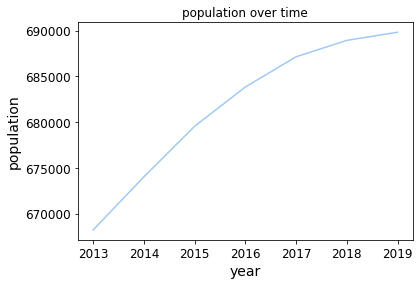

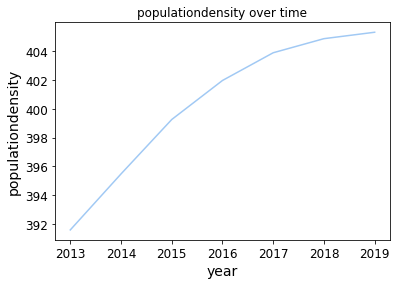

In [7]:
feature_list = ['2m_temperature', 'total_precipitation', 'low_vegetation_cover', 'high_vegetation_cover', 
                '10m_wind_speed', 'volumetric_soil_water_layer_1', 'total_cloud_cover', 'housingdensity', 
                'population', 'populationdensity'] #df.columns
for i in feature_list:
    temp = df.groupby(df.year)[i].apply(func=np.average).to_frame().reset_index()
    lp = sns.lineplot(x=temp.year, y=temp[i])
    lp.set_title(f"{i} over time")
    plt.show()
    
#sns.lineplot(x=temp0.year,y=temp0["2m_temperature"])
#sns.lineplot(x=temp.year,y=temp.total_precipitation)
#plt.show()

Vegetation cover doesn't have much of a change over time throughout the years. 2m_temperature begins decreasing from 2014, and all other features seem to have a upward trend.

### *Heat map of correlations between features
- removed vegetation cover because it doesn't have much change

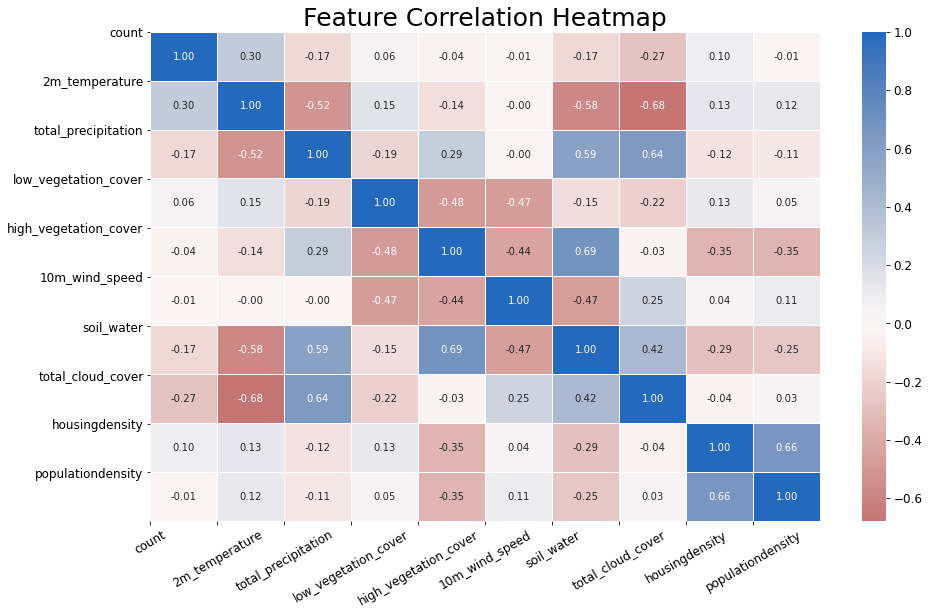

In [8]:
df_features = df[['count', '2m_temperature', 'total_precipitation', 'low_vegetation_cover', 'high_vegetation_cover', '10m_wind_speed', 'volumetric_soil_water_layer_1', 
                  'total_cloud_cover', 'housingdensity', 'populationdensity']]

corr_matrix = df_features.corr()
plt.figure(figsize=(15,9))
plt.title('Feature Correlation Heatmap', fontsize=25)
sns.heatmap(corr_matrix, annot=True, linewidths=0.05, fmt= '.2f', cmap='vlag_r', center=0)#sns.diverging_palette(10, 240, n=9), center=0
plt.xticks(rotation=30, ticks=np.arange(0, 10, step=1), labels=['count','2m_temperature', 'total_precipitation', 'low_vegetation_cover', 'high_vegetation_cover', '10m_wind_speed', 'soil_water', 'total_cloud_cover', 'housingdensity', 'populationdensity'])
plt.yticks(rotation=0, ticks=np.arange(0, 10, step=1), labels=['count','2m_temperature', 'total_precipitation', 'low_vegetation_cover', 'high_vegetation_cover', '10m_wind_speed', 'soil_water', 'total_cloud_cover', 'housingdensity', 'populationdensity'])
plt.show()

Negative correlations
- (2m_temperature, total_precipitation)
- (2m_temperature, volumetric_soil_water_layer_1)
- (2m_temperature, total_cloud_cover)
 
Positive correlations
- (total_precipitation, volumetric_soil_water_later_1)
- (total_precipitation, total_cloud_cover)
- (housingdensity, populationdensity)

### *Scatter matrix on highly correlated features based on heatmap (climate only)

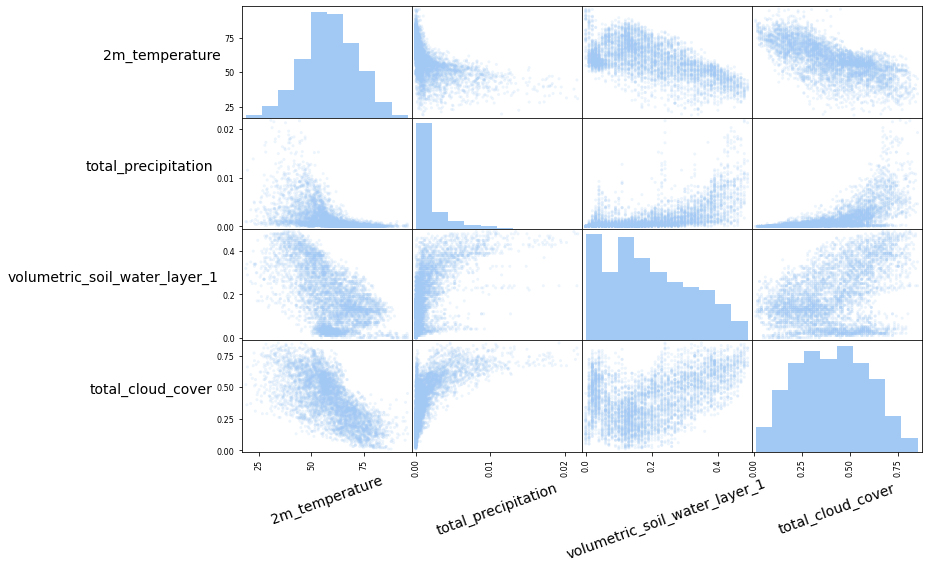

In [9]:
#from pandas.plotting import scatter_matrix
attributes = ["2m_temperature", "total_precipitation", "volumetric_soil_water_layer_1", "total_cloud_cover"]
#scatter_matrix(df[attributes], figsize=(12, 8))
axes = pd.plotting.scatter_matrix(df[attributes], alpha=0.2, figsize=[13,8])
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(20)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0) #spacing
plt.show()


### *Distribution of Fire Count on Summer Temperatures

In [10]:
#summer_df = df[(df['time'].str.slice(5,7) == '06') | (df['time'].str.slice(5,7) == '07') | (df['time'].str.slice(5,7) == '08')]
df['summer_temp'] = (df['2m_temperature'] >= 53.6).astype(int)
df['summer_temp'].value_counts()

1    3183
0    1521
Name: summer_temp, dtype: int64

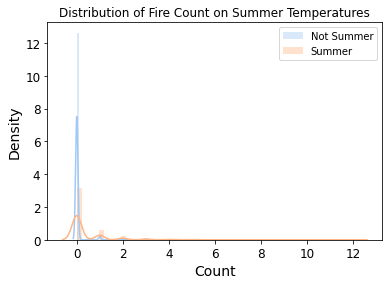

In [11]:
sns.distplot(df[df['summer_temp'] == 0]['count'], label='Not Summer')
sns.distplot(df[df['summer_temp'] == 1]['count'], label='Summer')
plt.title("Distribution of Fire Count on Summer Temperatures")
plt.xlabel("Count")
plt.ylabel('Density')
plt.legend()

In [12]:
df['summer_temp'].value_counts()

1    3183
0    1521
Name: summer_temp, dtype: int64

In [13]:
df['count'].value_counts()

0     3901
1      494
2      158
3       69
4       40
5       22
6       10
7        5
8        3
12       2
Name: count, dtype: int64

In [14]:
df_count_summer_less = df[df['count'] <= 2]

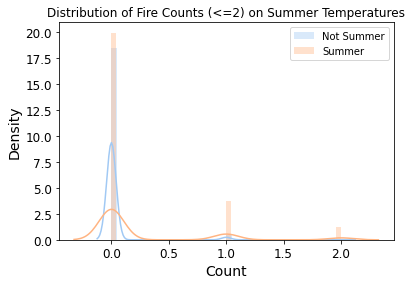

In [15]:
sns.distplot(df_count_summer_less[df_count_summer_less['summer_temp'] == 0]['count'], label='Not Summer')
sns.distplot(df_count_summer_less[df_count_summer_less['summer_temp'] == 1]['count'], label='Summer')
plt.title("Distribution of Fire Counts (<=2) on Summer Temperatures")
plt.xlabel("Count")
plt.ylabel('Density')
plt.legend();

The distribution of frequency on summer temperature is right skewed, as well as the frequency on not summer temperatures. Lets check fire counts of above 2.

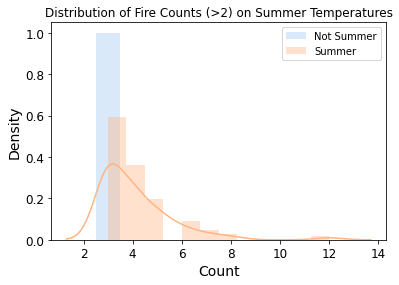

In [16]:
df_count_summer = df[df['count'] > 2]
sns.distplot(df_count_summer[df_count_summer['summer_temp'] == 0]['count'], label='Not Summer')
sns.distplot(df_count_summer[df_count_summer['summer_temp'] == 1]['count'], label='Summer')
plt.title("Distribution of Fire Counts (>2) on Summer Temperatures")
plt.xlabel("Count")
plt.ylabel('Density')
plt.legend();

The distribution of frequency on summer temperature is right skewed, as well as the frequency on not summer temperatures. More fires occur in summer.

### *TotalCloudCover vs FireFreqs on Summer temperatures
- cloudcover is highly (-)correlated to temperature based on previous visualization

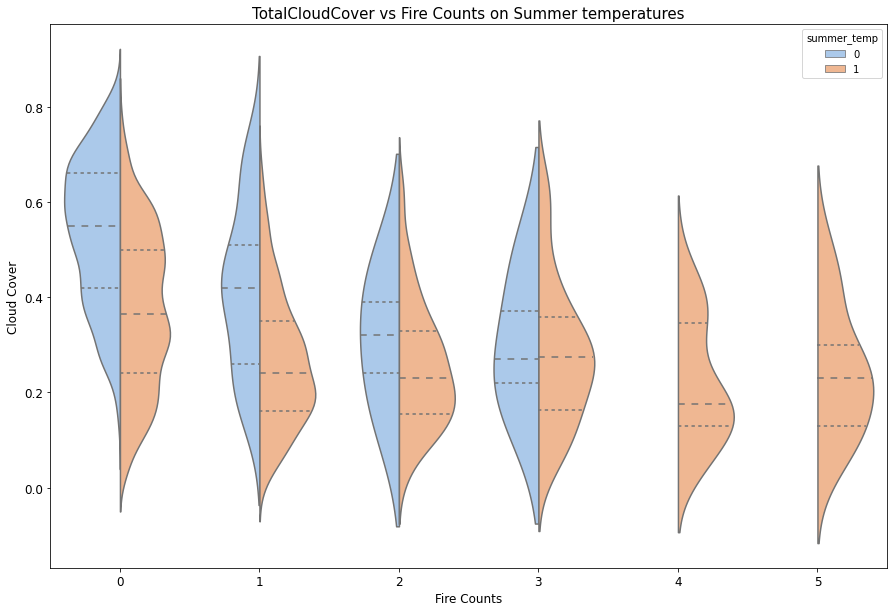

In [17]:
df_freq = df[df['count'] <= 5]
plt.figure(figsize=(15, 10))
sns.violinplot(y='total_cloud_cover', x='count', data=df_freq, hue='summer_temp', split=True, inner='quartile')
plt.title("TotalCloudCover vs Fire Counts on Summer temperatures", fontsize=15)
plt.xlabel("Fire Counts", fontsize=12)
plt.ylabel("Cloud Cover",fontsize=12);

When fire count on summer temperaturs increases (4+) cloud coverage descreases.

### *Population and HousingDensity by County

In [18]:
df_2019 = df[df.year == 2019] #grab the most updated human trigger info

In [19]:
df_2019_pop_dens = df_2019.groupby(['county', 'population', 'housingdensity'])['count'].apply(func=np.sum).to_frame().reset_index()

In [20]:
df_2019_pop_dens10 = df_2019_pop_dens.sort_values(by=['population', 'housingdensity'], ascending=False)[:10]
df_2019_pop_dens10

,county,population,housingdensity,count
17,Los Angeles,10039107,3579329,6
35,San Diego,3338330,1233777,16
28,Orange,3175692,1118110,0
31,Riverside,2470546,857148,32
34,San Bernardino,2180085,731400,7
40,Santa Clara,1927852,686266,11
0,Alameda,1671329,622922,9
32,Sacramento,1552058,578937,2
5,Contra Costa,1153526,418707,9
8,Fresno,999101,336473,3


<AxesSubplot:xlabel='county'>

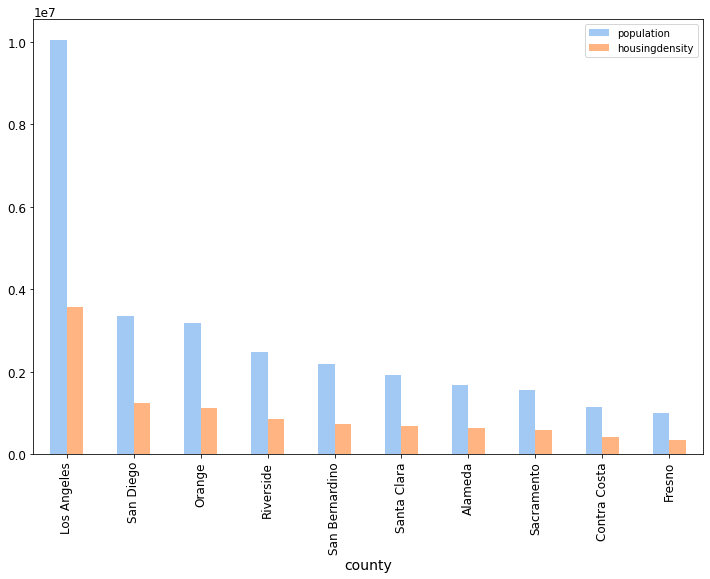

In [21]:
df_2019_pop_dens10.plot(x="county", y=["population", "housingdensity"], kind="bar", figsize=[12,8])

Population and housing density is highly correlated so mapping one of them on spatial

### *Spatial Representation of FireCount (circle size) by 2m_temperature (color) 

In [26]:
df_spatial = df.groupby(['latitude', 'longitude', 'county', 'population', 'housingdensity'])['count'].apply(func=np.average).to_frame().reset_index()
df_spatial.loc[df_spatial['longitude'] <= -123, 'longitude'] = df_spatial['longitude'] + 3

In [27]:
df_ctemp = df.groupby(['latitude', 'longitude', '2m_temperature', 'county'])['count'].apply(func=np.average).to_frame().reset_index()

In [28]:
#df_ctemp['latitude_revised'] = df_ctemp['latitude']*0.9
#df_ctemp['longitude_revised'] = df_ctemp['longitude'] + 1
df_ctemp.loc[df_ctemp['longitude'] <= -123, 'longitude'] = df_ctemp['longitude'] + 3
#df_ctemp[((df_ctemp['longitude'] > -119) & (df_ctemp['latitude'] > 37))] = df_ctemp['longitude'] - 0.5


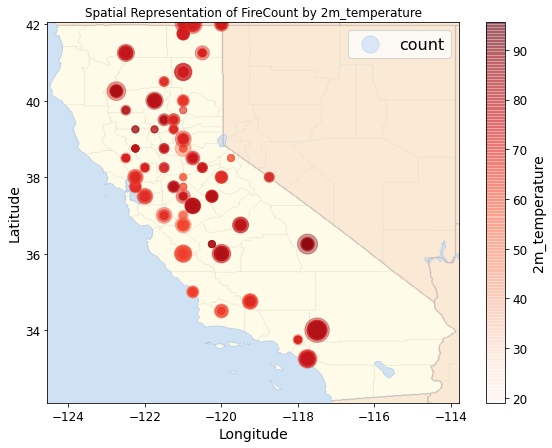

In [29]:
import matplotlib.image as mpimg
california_img=mpimg.imread("california.png")
ax = df_ctemp.plot(kind="scatter", x="longitude", y="latitude",
                    s=df_ctemp["count"]*50, label="count", figsize=(10,7), c="2m_temperature", 
                    cmap=plt.get_cmap("Reds"), 
                    colorbar=True, sharex=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.10, 42.05], alpha=0.5,
           cmap=plt.get_cmap("Reds"))#YlOrRd, Reds
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("Spatial Representation of FireCount by 2m_temperature")
plt.legend(fontsize=16)
plt.show()

### *Spatial Representation of FireCount (circle size) by HousingDensity (color) 

In [30]:
top10 = ['Los Angeles', 'San Diego', 'Orange', 'Riverside', 'San Bernardino', 'Santa Clara', 'Alameda', 'Sacramento', 'Contra Costa', 'Fresno']
df_spatial10 = df_spatial[df_spatial['county'].isin(top10)]
df_spatialnot10 = df_spatial[~df_spatial['county'].isin(top10)]
df_spatialnot10

,latitude,longitude,county,population,housingdensity,count
7,33.5,-116.0,Imperial,176438,56665,0.000000
8,33.5,-116.0,Imperial,177974,56958,0.000000
9,33.5,-116.0,Imperial,178937,57195,0.000000
10,33.5,-116.0,Imperial,180179,57484,0.000000
11,33.5,-116.0,Imperial,181215,58280,0.000000
...,...,...,...,...,...,...
387,42.0,-120.0,Lake,64044,35646,0.083333
388,42.0,-120.0,Lake,64111,34695,0.666667
389,42.0,-120.0,Lake,64260,35679,0.333333
390,42.0,-120.0,Lake,64317,34714,0.666667


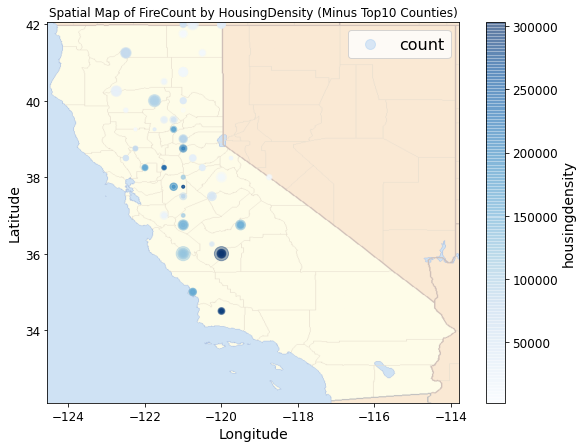

In [31]:
import matplotlib.image as mpimg
california_img=mpimg.imread("california.png")
ax = df_spatialnot10.plot(kind="scatter", x="longitude", y="latitude",
                    s=df_spatialnot10["count"]*100, label="count", figsize=(10,7), c="housingdensity", 
                    cmap=plt.get_cmap("Blues"), 
                    colorbar=True, sharex=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.10, 42.05], alpha=0.5,
           cmap=plt.get_cmap("Blues"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.title("Spatial Map of FireCount by HousingDensity (Minus Top10 Counties)")
plt.legend(fontsize=16)
plt.show()